In [1]:
#%load_ext line_profiler

#%lprun -f __main__ __main__()
import math
import numpy as np

#from pydrake.all import (BasicVector, DiagramBuilder, FloatingBaseType,
                         #RigidBodyPlant, RigidBodyTree, Simulator,SignalLogger)

from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)

from IPython.display import HTML

/usr/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Spawning PlanarRigidBodyVisualizer for tree with 2 actuators


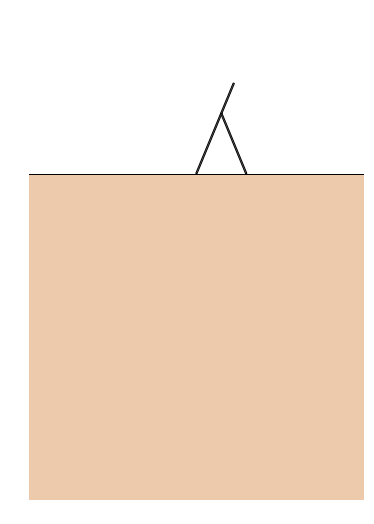

In [2]:
# Load the double pendulum from Universal Robot Description Format
#tree = RigidBodyTree(FindResource("double_pendulum/double_pendulum.urdf"), FloatingBaseType.kFixed)
#tree = RigidBodyTree(FindResource("../../notebooks/three_link.urdf"), FloatingBaseType.kFixed)
#tree = RigidBodyTree(FindResource("../../drake/examples/compass_gait/CompassGait.urdf"), FloatingBaseType.kFixed)



tree = RigidBodyTree(FindResource("../../notebooks/three_link.urdf"), FloatingBaseType.kFixed)

box_depth = 100

pi = math.pi

R = np.identity(3)
slope = 0
R[0, 0] = math.cos(slope)
R[0, 2] = math.sin(slope)
R[2, 0] = -math.sin(slope)
R[2, 2] = math.cos(slope)
X = Isometry3(rotation=R, translation=[0, 0, -5.])
                
color = np.array([0.9297, 0.7930, 0.6758, 1])
tree.world().AddVisualElement(VisualElement(Box([100., 1., 10.]), X, color))
tree.addCollisionElement(CollisionElement(Box([100., 1., 10.]), X), tree.world(), "the_ground")
tree.compile()

# Set up a block diagram with the robot (dynamics) and a visualization block.
builder = DiagramBuilder()
robot = builder.AddSystem(RigidBodyPlant(tree))

logger = builder.AddSystem(SignalLogger(robot.get_output_port(0).size()))
logger._DeclarePeriodicPublish(1. / 30., 0.0)

builder.Connect(robot.get_output_port(0), logger.get_input_port(0))
builder.ExportInput(robot.get_input_port(0)) #this allows the outside world to see push inputs in (or whatever)

diagram = builder.Build()

# Set up a simulator to run this diagram
simulator = Simulator(diagram)
#simulator.set_target_realtime_rate(1.0)
simulator.set_publish_every_time_step(False)

# Set the initial conditions
context = simulator.get_mutable_context()
context.FixInputPort(0, BasicVector([0., 0.]))  # Zero input torques
state = context.get_mutable_continuous_state_vector()
#state.SetFromVector((pi - pi/8, pi + pi/4 ,3*pi/2 - pi/4,0.,0.,0,))  # initial condition
state.SetFromVector((  pi + pi/8, pi - pi/4  , 3*pi/2 - pi/4,0.,0.,0,))  # initial condition

# Simulate for 10 seconds
simulator.StepTo(3)

prbv = PlanarRigidBodyVisualizer(tree, xlim=[-2.5, 2.5], ylim=[-5, 2.5])
ani = prbv.animate(logger, repeat=True)
#plt.close(prbv.fig)
HTML(ani.to_html5_video())
    
    

In [21]:
tree = RigidBodyTree(FindResource("../../notebooks/three_link.urdf"), FloatingBaseType.kFixed)

box_depth = 100

R = np.identity(3)
slope = 0
R[0, 0] = math.cos(slope)
R[0, 2] = math.sin(slope)
R[2, 0] = -math.sin(slope)
R[2, 2] = math.cos(slope)
X = Isometry3(rotation=R, translation=[0, 0, -5.])
                
color = np.array([0.9297, 0.7930, 0.6758, 1])
tree.world().AddVisualElement(VisualElement(Box([100., 1., 10.]), X, color))

help(tree.addCollisionElement)
#help(CollisionElement)
#help(Box)
#help(tree.world)

tree.addCollisionElement(CollisionElement(Box([100., 1., 10.]), X), tree.world(), "the_ground")
tree.compile()

Help on method addCollisionElement in module pydrake.multibody.rigid_body_tree:

addCollisionElement(...) method of pydrake.multibody.rigid_body_tree.RigidBodyTree instance
    addCollisionElement(self: pydrake.multibody.rigid_body_tree.RigidBodyTree, arg0: pydrake.multibody.collision.CollisionElement, arg1: pydrake.multibody.rigid_body.RigidBody, arg2: unicode) -> None



In [11]:
help(diagram)

Help on Diagram_[float] in module pydrake.systems.framework object:

class Diagram_[float](System_[float])
 |  Method resolution order:
 |      Diagram_[float]
 |      System_[float]
 |      pybind11_builtins.pybind11_object
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  GetMutableSubsystemContext(...)
 |      GetMutableSubsystemContext(self: pydrake.systems.framework.Diagram_[float], arg0: pydrake.systems.framework.System_[float], arg1: drake::systems::Context<double>) -> drake::systems::Context<double>
 |  
 |  GetMutableSubsystemState(...)
 |      GetMutableSubsystemState(self: pydrake.systems.framework.Diagram_[float], arg0: pydrake.systems.framework.System_[float], arg1: drake::systems::Context<double>) -> drake::systems::State<double>
 |  
 |  __del__ = (...)
 |      (self: handle) -> None
 |  
 |  __init__(...)
 |      x.__init__(...) initializes x; see help(type(x)) for signature
 |  
 |  ----------------------------------------------------------------------